## Importing Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import wfdb
from scipy import signal
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Path to PTBXL, please adjust accordingly

In [113]:
DATASET_PATH = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'

## Loading the Data

In [114]:
df = pd.read_csv(os.path.join(DATASET_PATH, 'ptbxl_database.csv'), index_col='ecg_id')
scp_df = pd.read_csv(os.path.join(DATASET_PATH, 'scp_statements.csv'), index_col=0)
df['scp_codes'] = df['scp_codes'].apply(lambda x: eval(x))

In [115]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in scp_df.index:
            diagnostic_class = scp_df.loc[key]['diagnostic_class']
            if isinstance(diagnostic_class, str) and diagnostic_class.strip():
                tmp.append(diagnostic_class)
    return list(set(tmp))


In [116]:
df['diagnostic_superclass'] = df['scp_codes'].apply(aggregate_diagnostic)

In [117]:
print(df['diagnostic_superclass'].head())
df

ecg_id
1    [NORM]
2    [NORM]
3    [NORM]
4    [NORM]
5    [NORM]
Name: diagnostic_superclass, dtype: object


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]


In [118]:
df = df[df['diagnostic_superclass'].map(len) > 0].reset_index(drop=True)

In [119]:
print(df['diagnostic_superclass'].head(1000))


0           [NORM]
1           [NORM]
2           [NORM]
3           [NORM]
4           [NORM]
          ...     
995    [STTC, HYP]
996         [NORM]
997         [NORM]
998         [NORM]
999           [CD]
Name: diagnostic_superclass, Length: 1000, dtype: object


In [120]:
def aggregate_subdiagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in scp_df.index:
            diagnostic_subclass = scp_df.loc[key]['diagnostic_subclass']
            if isinstance(diagnostic_subclass, str) and diagnostic_subclass.strip():
                tmp.append(diagnostic_subclass)
    return list(set(tmp))

In [121]:
df['diagnostic_subclass'] = df['scp_codes'].apply(aggregate_subdiagnostic)

In [122]:
print(df['diagnostic_subclass'].head(1000))

0           [NORM]
1           [NORM]
2           [NORM]
3           [NORM]
4           [NORM]
          ...     
995    [STTC, LVH]
996         [NORM]
997         [NORM]
998         [NORM]
999        [CRBBB]
Name: diagnostic_subclass, Length: 1000, dtype: object


## Refining the data and End Pre-Processing

In [123]:
df['diagnostic_superclass'] = df['diagnostic_superclass'].apply(
    lambda lst: [x for x in lst if isinstance(x, str) and x.strip()]
)
df = df[df['diagnostic_superclass'].map(len) > 0].reset_index(drop=True)

In [124]:
df['diagnostic_subclass'] = df['diagnostic_subclass'].apply(
    lambda lst: [x for x in lst if isinstance(x, str) and x.strip()]
)
df = df[df['diagnostic_subclass'].map(len) > 0].reset_index(drop=True)

In [125]:
scp_df = pd.read_csv(
    os.path.join(DATASET_PATH, 'scp_statements.csv'),
    index_col=0
)
print("Unique diagnostic classes:")
print(scp_df['diagnostic_class'].unique())

Unique diagnostic classes:
['STTC' 'NORM' 'MI' 'HYP' 'CD' nan]


In [126]:
print(df['diagnostic_superclass'].head())

0    [NORM]
1    [NORM]
2    [NORM]
3    [NORM]
4    [NORM]
Name: diagnostic_superclass, dtype: object


In [127]:
print(df['diagnostic_subclass'].head(1000))

0           [NORM]
1           [NORM]
2           [NORM]
3           [NORM]
4           [NORM]
          ...     
995    [STTC, LVH]
996         [NORM]
997         [NORM]
998         [NORM]
999        [CRBBB]
Name: diagnostic_subclass, Length: 1000, dtype: object


## Setting up a Multilabel Binarizer

In [131]:
from sklearn.preprocessing import MultiLabelBinarizer
all_labels = df['diagnostic_superclass'].tolist() + df['diagnostic_subclass'].tolist()

mlb = MultiLabelBinarizer()
mlb.fit(all_labels)
labels = mlb.transform(df['diagnostic_superclass'])  # For initial labeling

print("All Classes:")
print(mlb.classes_)
print(labels)
print(labels.shape)

All Classes:
['AMI' 'CD' 'CLBBB' 'CRBBB' 'HYP' 'ILBBB' 'IMI' 'IRBBB' 'ISCA' 'ISCI'
 'ISC_' 'IVCD' 'LAFB/LPFB' 'LAO/LAE' 'LMI' 'LVH' 'MI' 'NORM' 'NST_' 'PMI'
 'RAO/RAE' 'RVH' 'SEHYP' 'STTC' 'WPW' '_AVB']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(21388, 26)


In [132]:
df['filename'] = df['filename_hr'].apply(lambda x: os.path.join(DATASET_PATH, x))

## Continued Preprocessing of Signals (Plus Downsampling to reduce Computations for testing)

In [134]:
def load_signals(df):
    signals = []
    count = 0
    for filename in df['filename']:
        signal, fields = wfdb.rdsamp(filename)
        signals.append(signal)
        count+=1
        if(count > 2000):
            break
    return np.array(signals)
X = load_signals(df)
def downsample_signals(X, target_length=1000):
    X_downsampled = signal.resample(X, target_length, axis=1)
    return X_downsampled

X = downsample_signals(X, target_length=1000)

def normalize_signals(X):
    N, L, C = X.shape
    X_normalized = np.zeros_like(X)
    for i in range(N):
        scaler = StandardScaler()
        X_normalized[i] = scaler.fit_transform(X[i])
    return X_normalized

X = normalize_signals(X)
print(len(X))

2001


## Splitting Train and Test

In [135]:
df = df.reset_index()
train_indices = df[df.strat_fold < 10].index
test_indices = df[df.strat_fold == 10].index

v = X.shape[0]
train_indices = [i for i in train_indices if i < v]
test_indices = [i for i in test_indices if i < v]

X_train = X[train_indices]
X_test = X[test_indices]

y_train = labels[train_indices]
y_test = labels[test_indices]

## Resnet

In [150]:
input_shape = X.shape[1:]
num_classes = len(mlb.classes_)
def build_resnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    def res_block(x, filters, kernel_size=3, stride=1):
        shortcut = x
        x = layers.Conv1D(filters, kernel_size, strides=stride, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv1D(filters, kernel_size, strides=1, padding='same')(x)
        x = layers.BatchNormalization()(x)
        if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
            shortcut = layers.Conv1D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        x = layers.add([x, shortcut])
        x = layers.ReLU()(x)
        return x

    x = res_block(x, 64)
    x = res_block(x, 64)
    
    x = res_block(x, 128, stride=2)
    x = res_block(x, 128)
    
    x = res_block(x, 256, stride=2)
    x = res_block(x, 256)
    
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    
    model = models.Model(inputs, outputs)
    return model

def build_model():
    return build_resnet(input_shape, num_classes)

In [159]:
model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [160]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)


Epoch 1/10
55/55 [==============================] - 5s 36ms/step - loss: 0.1360 - accuracy: 0.5749 - val_loss: 0.0955 - val_accuracy: 0.5494
Epoch 2/10
55/55 [==============================] - 1s 27ms/step - loss: 0.0638 - accuracy: 0.6711 - val_loss: 0.0793 - val_accuracy: 0.5850
Epoch 3/10
55/55 [==============================] - 1s 26ms/step - loss: 0.0593 - accuracy: 0.6899 - val_loss: 0.0748 - val_accuracy: 0.6285
Epoch 4/10
55/55 [==============================] - 1s 26ms/step - loss: 0.0562 - accuracy: 0.6997 - val_loss: 0.0710 - val_accuracy: 0.6403
Epoch 5/10
55/55 [==============================] - 1s 26ms/step - loss: 0.0535 - accuracy: 0.7237 - val_loss: 0.0721 - val_accuracy: 0.6364
Epoch 6/10
55/55 [==============================] - 1s 26ms/step - loss: 0.0524 - accuracy: 0.7248 - val_loss: 0.0750 - val_accuracy: 0.6047
Epoch 7/10
55/55 [==============================] - 1s 26ms/step - loss: 0.0473 - accuracy: 0.7351 - val_loss: 0.0706 - val_accuracy: 0.6759
Epoch 8/10
55

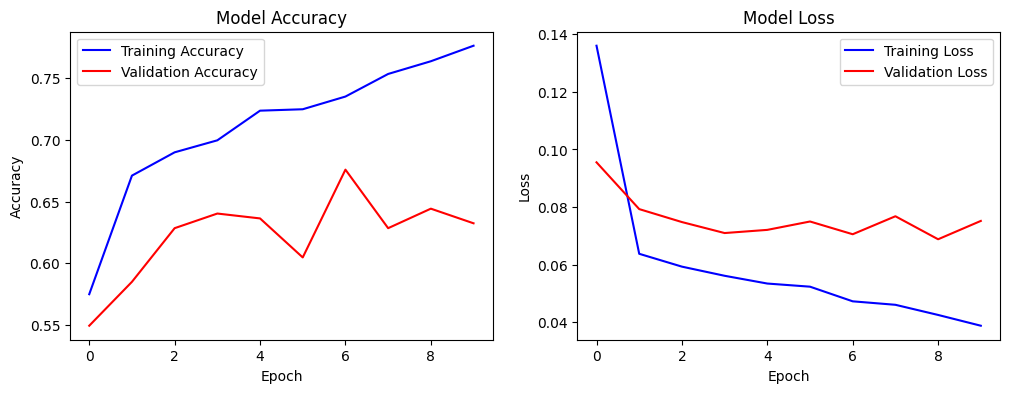

In [161]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from sklearn.utils import shuffle

# Assuming X_train and Y_train are numpy arrays
# and you want to partition them into 5 users

# Shuffle the data to ensure IID
X_train_t, Y_train_t = shuffle(X_train, y_train, random_state=42)
# print(len(X_train))
# Number of users
n_users = 5

# Split the data into n_users parts
X_split = np.array_split(X_train_t, n_users)
Y_split = np.array_split(Y_train_t, n_users)

# Now, X_split and Y_split contain the training data for each user
# Example: data for user 1 will be X_split[0] and Y_split[0]
print(X_train.shape)
for i in range(n_users):
    print(f"User {i+1} - X size: {len(X_split[i])}, Y size: {len(Y_split[i])}")

--------------------------------------------------------------------------------------------------------------------------------
ROUND NUMBER: 0
--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
CLIENT ID: 4
--------------------------------------------------------------------------------------------------------------------------------
Epoch 1/10
11/11 [==============================] - 4s 73ms/step - loss: 0.2671 - accuracy: 0.5272 - val_loss: 0.1616 - val_accuracy: 0.1897
Epoch 2/10
11/11 [==============================] - 0s 33ms/step - loss: 0.0726 - accuracy: 0.6074 - val_loss: 0.1493 - val_accuracy: 0.5534
Epoch 3/10
11/11 [==============================] - 0s 33ms/step - loss: 0.0566 - accuracy: 0.6934 - val_loss: 0.1487 - val_accuracy: 0.5534
Epoch 4/10
11/11 [==============

Text(0.5, 1.0, 'Training graph for resnet')

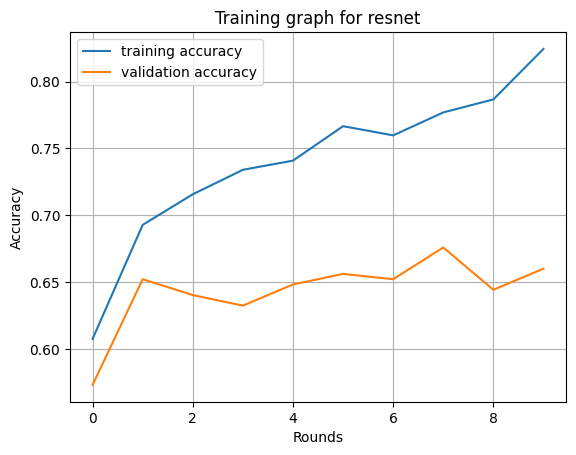

In [154]:
#Federated Learning on ResNet
global_model = build_model()
global_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
w = global_model.get_weights()

model_list = []
for user in range(n_users):
    m = build_model()
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_list.append(m)

num_samples = 3
tr_acc = []
val_acc = []
counts = np.zeros(n_users)
for epoch in range(10):
    print("--------------------------------------------------------------------------------------------------------------------------------")
    print("ROUND NUMBER:", epoch)
    print("--------------------------------------------------------------------------------------------------------------------------------")
    w_old = global_model.get_weights()
    w_new = []
    sample_user_list = np.random.choice(n_users, num_samples, replace = False)
    for i in w_old:
        w_new.append(np.zeros(i.shape))
    N = 0
    for user in sample_user_list:
        N += X_split[user].shape[0]
    for user in sample_user_list:
        print("--------------------------------------------------------------------------------------------------------------------------------")
        print("CLIENT ID:", user)
        print("--------------------------------------------------------------------------------------------------------------------------------")
        model_list[user].set_weights(w_old)
        counts[user]+=1
        batch_size = 32
        epochs = 10
        history = model_list[user].fit(
            X_split[user], Y_split[user],
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test)
        )
        print(history)
        with tf.device('/GPU:0'):
            w_k = model_list[user].get_weights()
        m = X_split[user].shape[0]
        for i in range(len(w_old)):
            w_new[i] += m / N * (w_k[i])
    with tf.device('/GPU:0'):
        global_model.set_weights(w_new)
    tr_acc.append(global_model.evaluate(X_train, y_train, batch_size = 128)[1])
    val_acc.append(global_model.evaluate(X_test, y_test, batch_size = 128)[1])
print("Number of times each client was chosen")
print(counts)
plt.plot(range(10), tr_acc, label = 'training accuracy')
plt.plot(range(10), val_acc, label = 'validation accuracy')
plt.grid()
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.title('Training graph for resnet')

In [155]:
results = global_model.evaluate(X_test, y_test, batch_size=128)
results = global_model.evaluate(X_train, y_train, batch_size=128)

14/14 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 0.8244


## CNN

In [162]:
def build_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]
model = build_cnn(input_shape, num_classes)


In [163]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# batch_size = 32
# epochs = 10
# history = model.fit(
#     X_train, y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     validation_data=(X_test, y_test)
# )

In [164]:
import numpy as np
from sklearn.utils import shuffle

# Assuming X_train and Y_train are numpy arrays
# and you want to partition them into 5 users

# Shuffle the data to ensure IID
X_train_t, Y_train_t = shuffle(X_train, y_train, random_state=42)
# print(len(X_train))
# Number of users
n_users = 5

# Split the data into n_users parts
X_split = np.array_split(X_train_t, n_users)
Y_split = np.array_split(Y_train_t, n_users)

# Now, X_split and Y_split contain the training data for each user
# Example: data for user 1 will be X_split[0] and Y_split[0]
print(X_train.shape)
for i in range(n_users):
    print(f"User {i+1} - X size: {len(X_split[i])}, Y size: {len(Y_split[i])}")

(1748, 1000, 12)
User 1 - X size: 350, Y size: 350
User 2 - X size: 350, Y size: 350
User 3 - X size: 350, Y size: 350
User 4 - X size: 349, Y size: 349
User 5 - X size: 349, Y size: 349


--------------------------------------------------------------------------------------------------------------------------------
ROUND NUMBER: 0
--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
CLIENT ID: 2
--------------------------------------------------------------------------------------------------------------------------------
Epoch 1/10
11/11 [==============================] - 1s 40ms/step - loss: 0.6112 - accuracy: 0.1371 - val_loss: 0.1834 - val_accuracy: 0.4348
Epoch 2/10
11/11 [==============================] - 0s 21ms/step - loss: 0.4534 - accuracy: 0.3400 - val_loss: 0.2287 - val_accuracy: 0.4783
Epoch 3/10
11/11 [==============================] - 0s 21ms/step - loss: 0.3217 - accuracy: 0.4286 - val_loss: 0.2295 - val_accuracy: 0.5099
Epoch 4/10
11/11 [==============

Text(0.5, 1.0, 'Training graph for CNN')

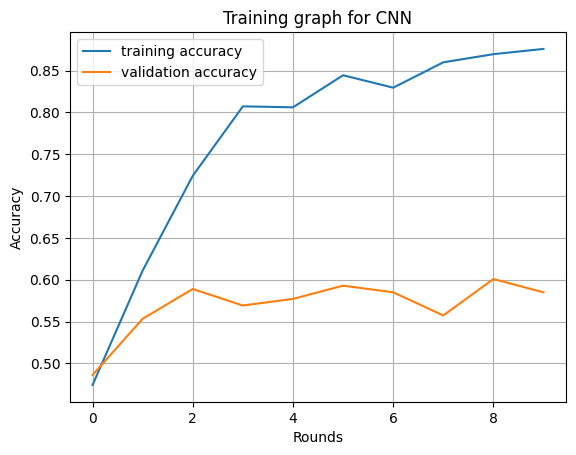

In [165]:
#Federated Learning on CNN
#Federated Learning on resnet
global_model = build_cnn(input_shape, num_classes)
global_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
w = global_model.get_weights()

model_list = []
for user in range(n_users):
    m = build_cnn(input_shape, num_classes)
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_list.append(m)

num_samples = 3
tr_acc = []
val_acc = []
counts = np.zeros(n_users)
for epoch in range(10):
    print("--------------------------------------------------------------------------------------------------------------------------------")
    print("ROUND NUMBER:", epoch)
    print("--------------------------------------------------------------------------------------------------------------------------------")
    w_old = global_model.get_weights()
    w_new = []
    sample_user_list = np.random.choice(n_users, num_samples, replace = False)
    for i in w_old:
        w_new.append(np.zeros(i.shape))
    N = 0
    for user in sample_user_list:
        N += X_split[user].shape[0]
    for user in sample_user_list:
        print("--------------------------------------------------------------------------------------------------------------------------------")
        print("CLIENT ID:", user)
        print("--------------------------------------------------------------------------------------------------------------------------------")
        model_list[user].set_weights(w_old)
        counts[user]+=1
        batch_size = 32
        epochs = 10
        history = model_list[user].fit(
            X_split[user], Y_split[user],
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test)
        )
        print(history)
        with tf.device('/GPU:0'):
            w_k = model_list[user].get_weights()
        m = X_split[user].shape[0]
        for i in range(len(w_old)):
            w_new[i] += m / N * (w_k[i])
    with tf.device('/GPU:0'):
        global_model.set_weights(w_new)
    tr_acc.append(global_model.evaluate(X_train, y_train, batch_size = 128)[1])
    val_acc.append(global_model.evaluate(X_test, y_test, batch_size = 128)[1])
print("Number of times each client was chosen")
print(counts)
plt.plot(range(10), tr_acc, label = 'training accuracy')
plt.plot(range(10), val_acc, label = 'validation accuracy')
plt.grid()
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.title('Training graph for CNN')

In [167]:
results = global_model.evaluate(X_test, y_test, batch_size=128)
results = global_model.evaluate(X_train, y_train, batch_size=128)

14/14 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 0.8759
